<a href="https://colab.research.google.com/github/ShivamGuptaaaa/Diwali_sales_insights/blob/main/Diwali_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : **Shivam Gupta**
#Project : **Diwali Sales Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Diwali_Sales_Analysis/Diwali Sales Data.csv', encoding= 'unicode_escape')
#encoding to avoid error, use unicode_escape

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


 As we see two empty columns have a null value.

#**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#Drop column (Status, unnamed)
df.drop(['Status','unnamed1'],axis = 1, inplace=True)

In [ ]:
# we clearly see, dropped Status and unnamned column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
df.shape

(11239, 13)

In [ ]:
#Check null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.shape
# row: 11251, column: 13

(11251, 13)

In [ ]:
# drop null value
df.dropna(inplace = True)

In [ ]:
df.shape
# droped null value

(11239, 13)

In [ ]:
# check null value
pd.isnull(df).sum()
# No null value in the data

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
# data type Amount is Float convert it to a int
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtype
#converted to int

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


#Exploratory Data Analysis (**EDA**)

#**Gender**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<ipython-input-19-399a35f86e52>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Gender', data=df, palette = 'husl')


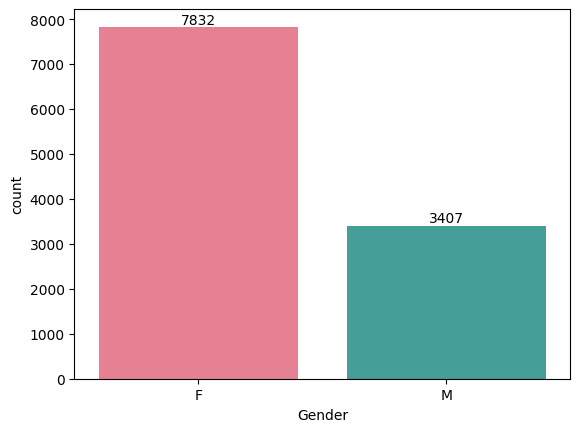

In [ ]:
ax = sns.countplot(x = 'Gender', data=df, palette = 'husl')

for bar in ax.containers:
  ax.bar_label(bar)
#for loop is for value

<ipython-input-20-5063f5faa64f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender',y ='Amount', data=sale_gender,palette = 'husl')


<Axes: xlabel='Gender', ylabel='Amount'>

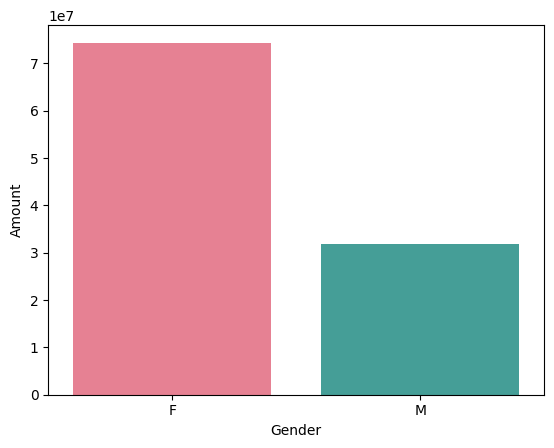

In [ ]:
# Done groupby on basis of Gender and sum(Amount and amount value sort)
sale_gender = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Gender',y ='Amount', data=sale_gender,palette = 'husl')

From the above we clearly see that most of the buyers are female and even more purchasing power than Male

#**Age**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

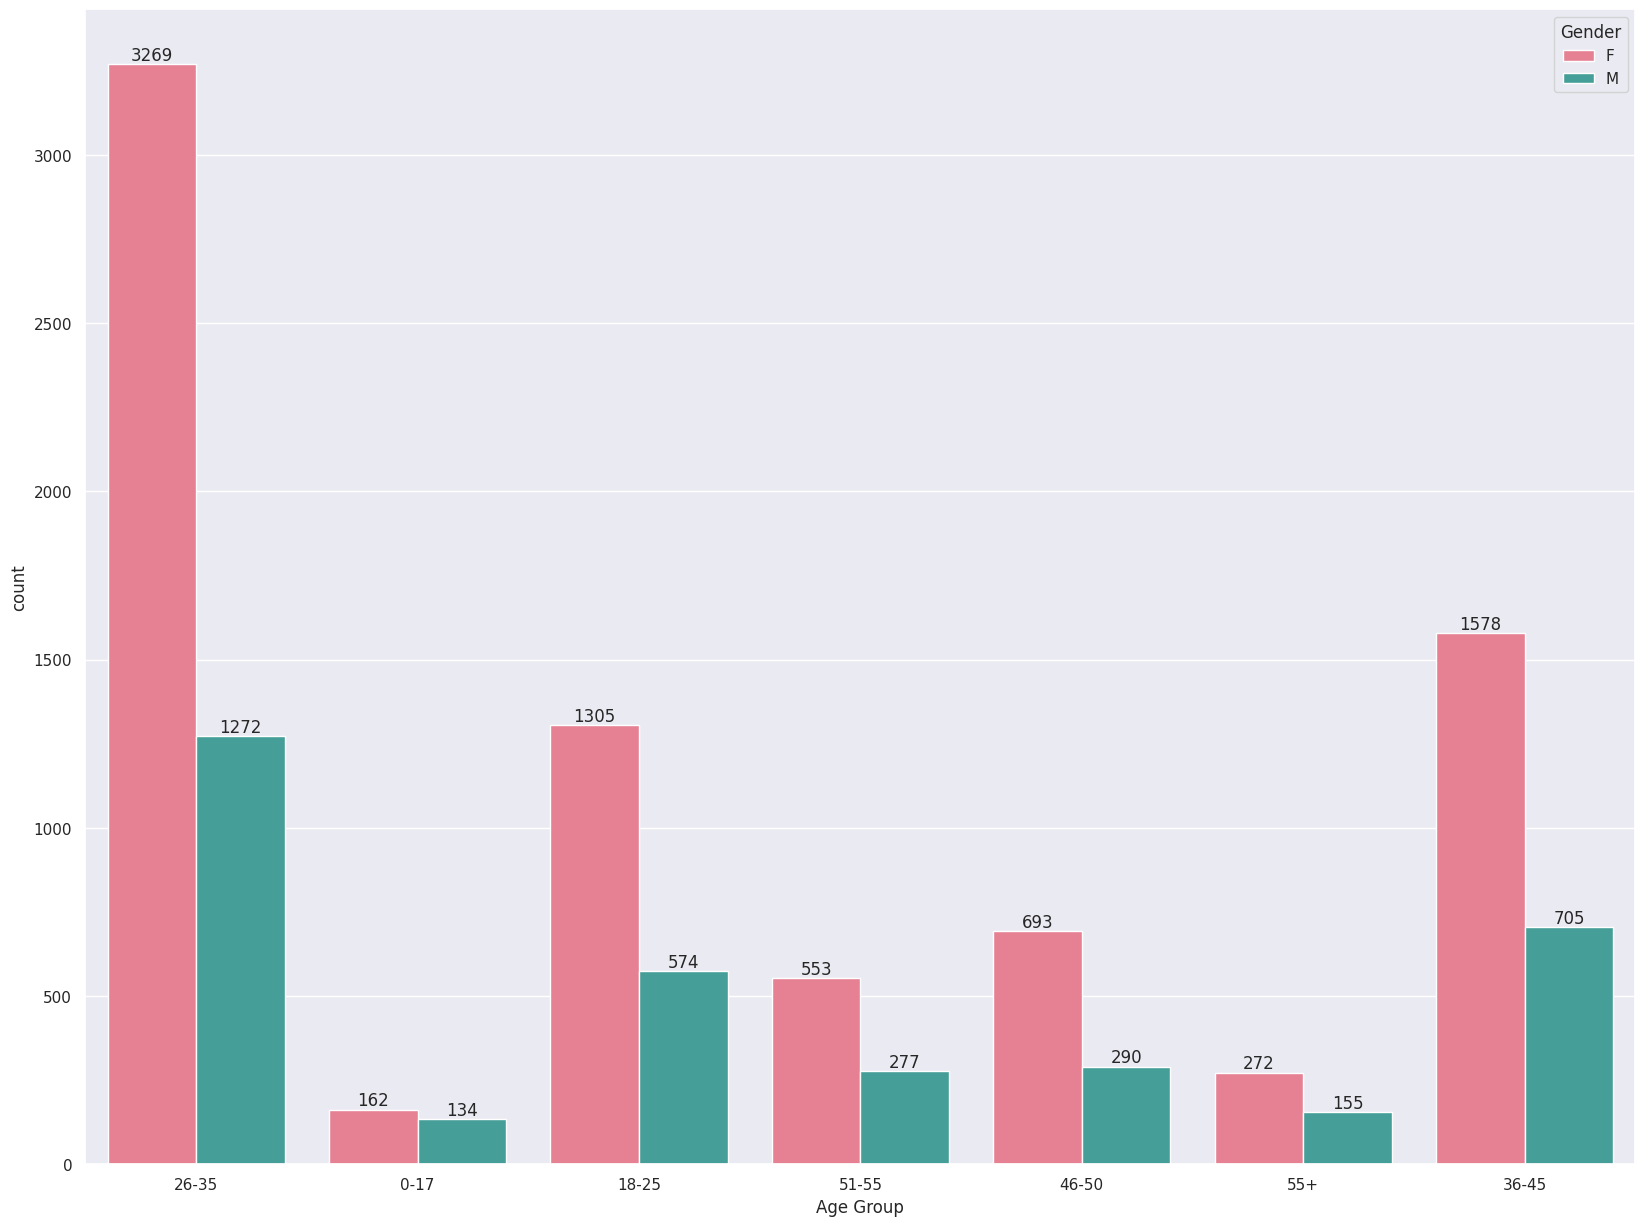

In [ ]:
ax = sns.countplot(x='Age Group', data=df, hue='Gender', palette ='husl')

for bar in ax.containers:
  ax.bar_label(bar)

<ipython-input-23-a7e84b71727e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group',y='Amount',data=sale_age,palette = 'deep')


<Axes: xlabel='Age Group', ylabel='Amount'>

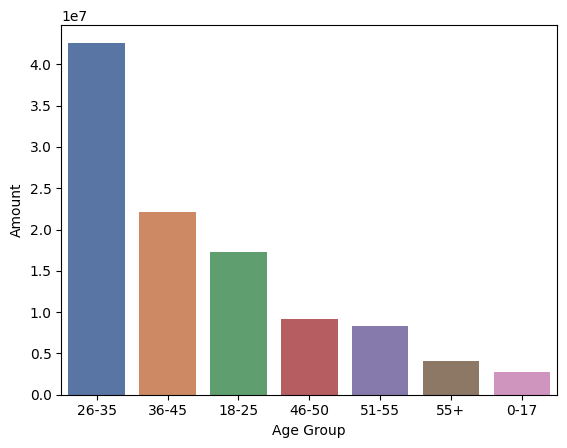

In [ ]:
sale_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sns.barplot(x='Age Group',y='Amount',data=sale_age,palette = 'deep')

From above graph we see the most of the purchases are at the age group 26-35 female

#**State**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<ipython-input-25-67beab91629b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_state, x='State',y='Orders',palette = 'deep')


<Axes: xlabel='State', ylabel='Orders'>

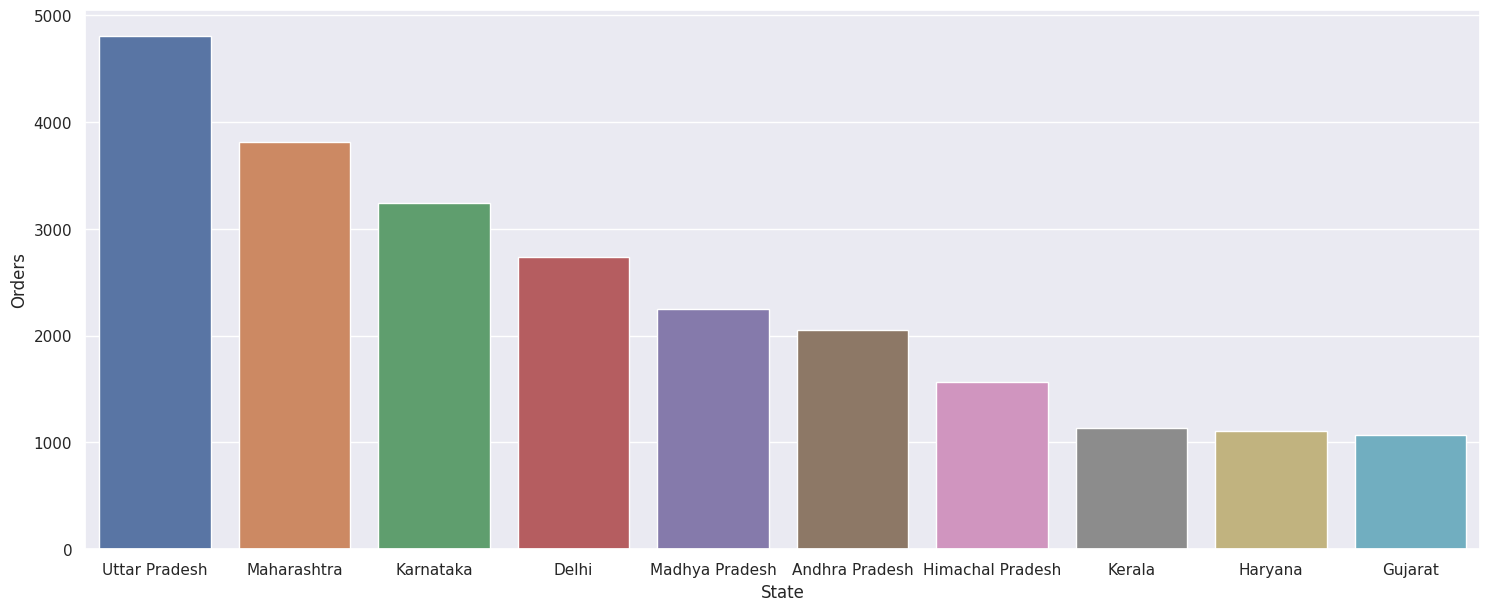

In [ ]:
#total number of orders from 10 states

sale_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)
sns.set(rc={'figure.figsize':(18,7)})
sns.barplot(data=sale_state, x='State',y='Orders',palette = 'deep')

<ipython-input-26-cdb3d2f703b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_amount, x='State',y='Amount',palette = 'deep')


<Axes: xlabel='State', ylabel='Amount'>

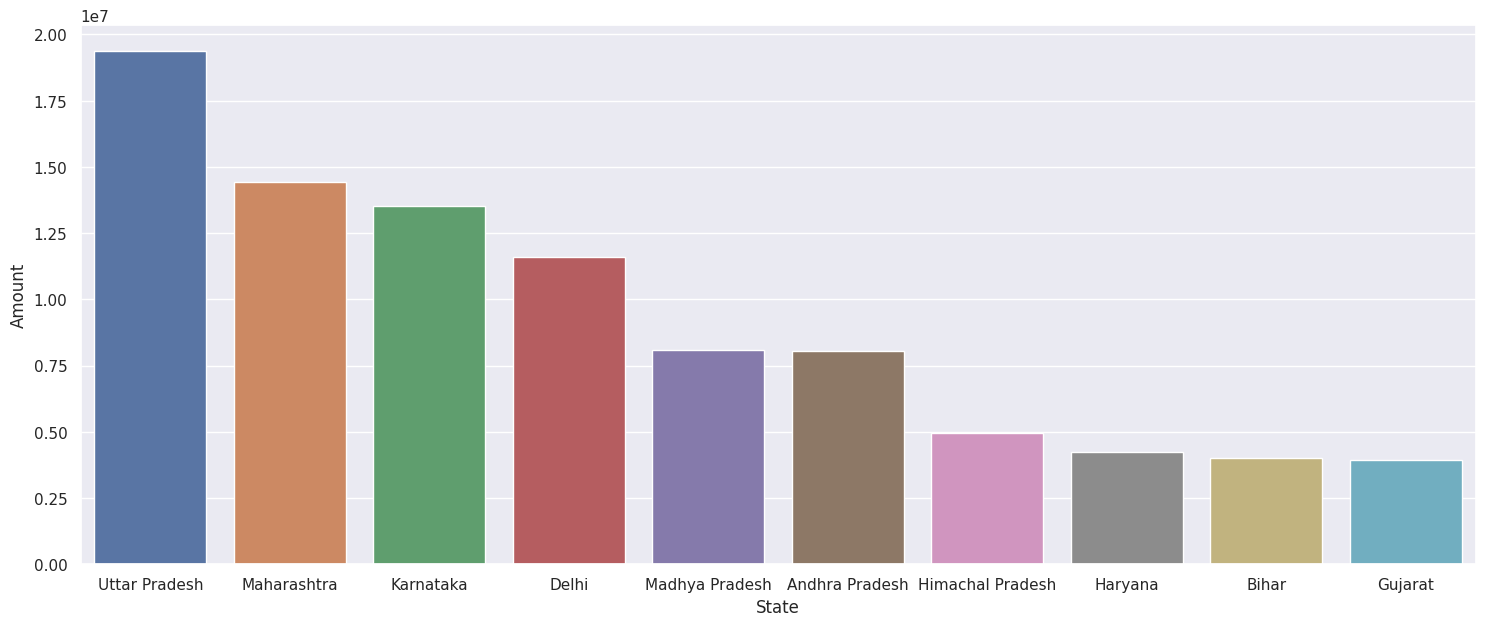

In [ ]:
#total amount sales from 10 states
sale_amount = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)
sns.set(rc={'figure.figsize':(18,7)})
sns.barplot(data=sale_amount, x='State',y='Amount',palette = 'deep')

In the above graph we can see that most of the orders and sale/amount from Uttar Pradesh, Maharashtra, Karnataka respectively

#**Martial_Status**

<ipython-input-27-1f561565dd2d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Marital_Status', data=df, palette ='husl')


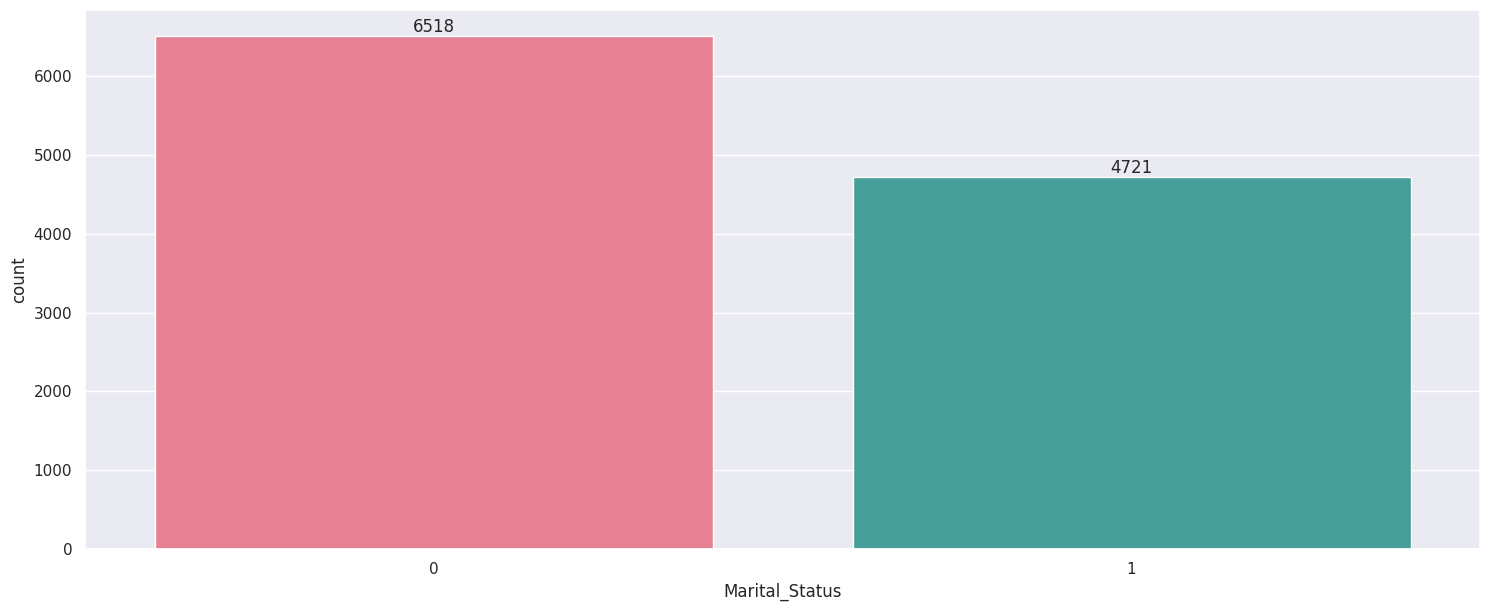

In [ ]:
ax = sns.countplot(x='Marital_Status', data=df, palette ='husl')

sns.set(rc={'figure.figsize':(7,5)})
for bar in ax.containers:
  ax.bar_label(bar)

# 0 means married and 1 is non-married

<Axes: xlabel='Marital_Status', ylabel='Amount'>

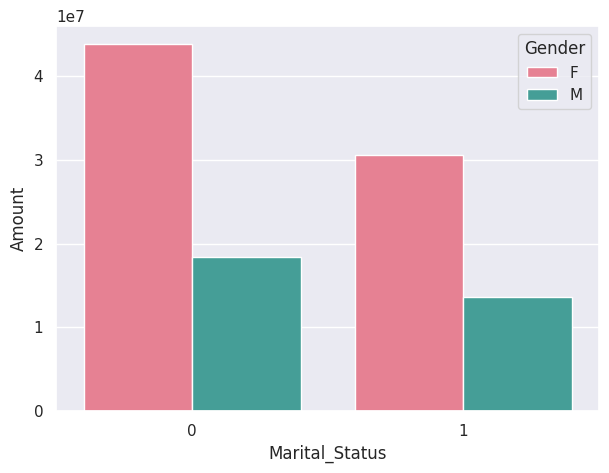

In [ ]:
sale_marital_status = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sale_marital_status,palette = 'husl')

As we can see from the above graph most married women has high purchasing power

#**Occupation**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<ipython-input-36-d39e1293e68e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Occupation', data=df, palette = 'husl')


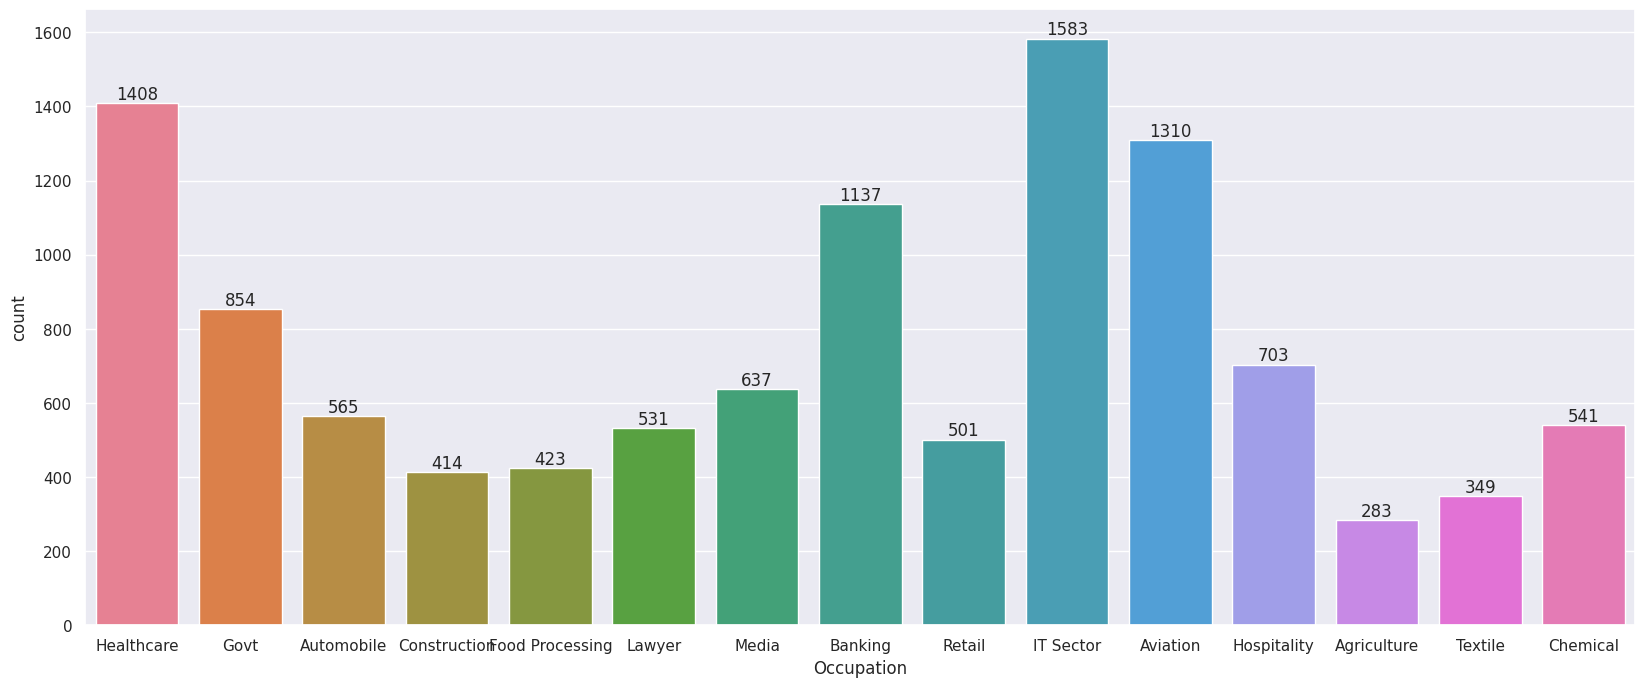

In [ ]:
ax = sns.countplot(x = 'Occupation', data=df, palette = 'husl')
sns.set(rc={'figure.figsize':(20,15)})
for bar in ax.containers:
  ax.bar_label(bar)
#for loop is for value

<ipython-input-31-f359e87bf3a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_occupation, x='Occupation',y='Amount',palette = 'deep')


<Axes: xlabel='Occupation', ylabel='Amount'>

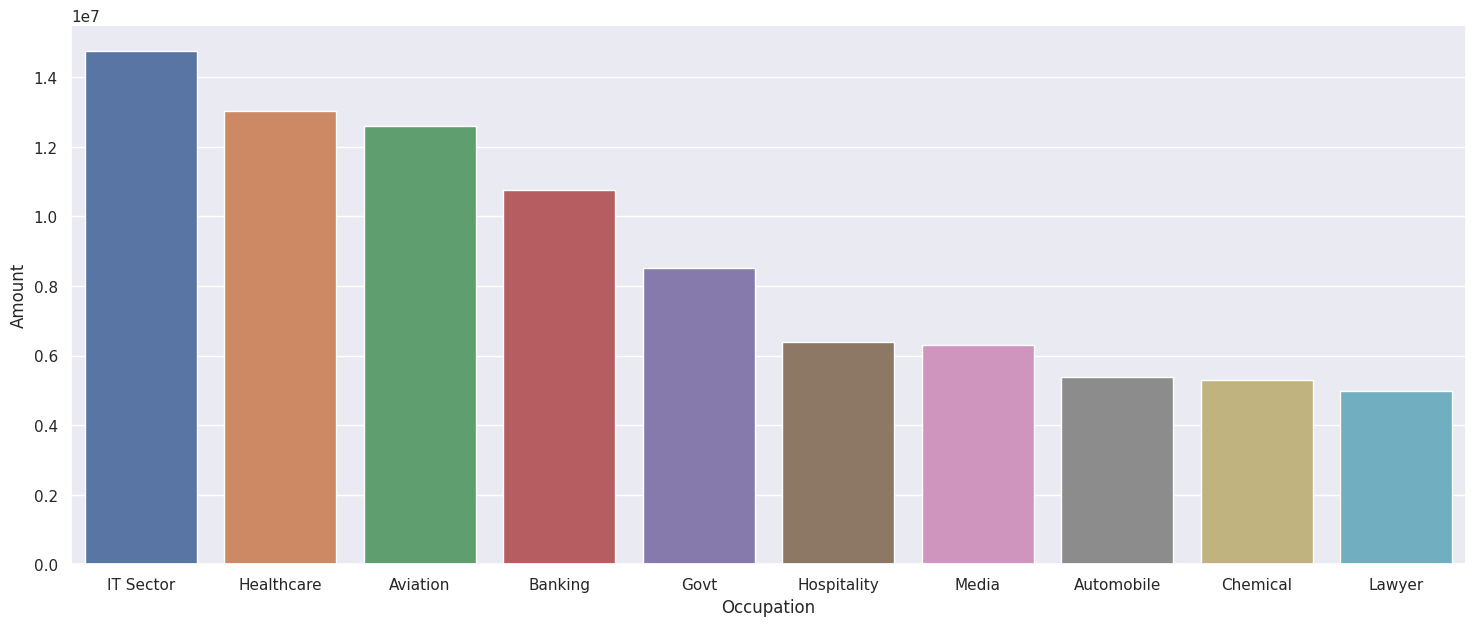

In [ ]:
sale_occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)
sns.set(rc={'figure.figsize':(18,7)})
sns.barplot(data=sale_occupation, x='Occupation',y='Amount',palette = 'deep')

As we see from the above graph most purchases is from IT sector, Healthcare,Aviation

#**Product_Caterogy**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<ipython-input-33-19a2dbea4c06>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Product_Category', data=df, palette = 'husl')


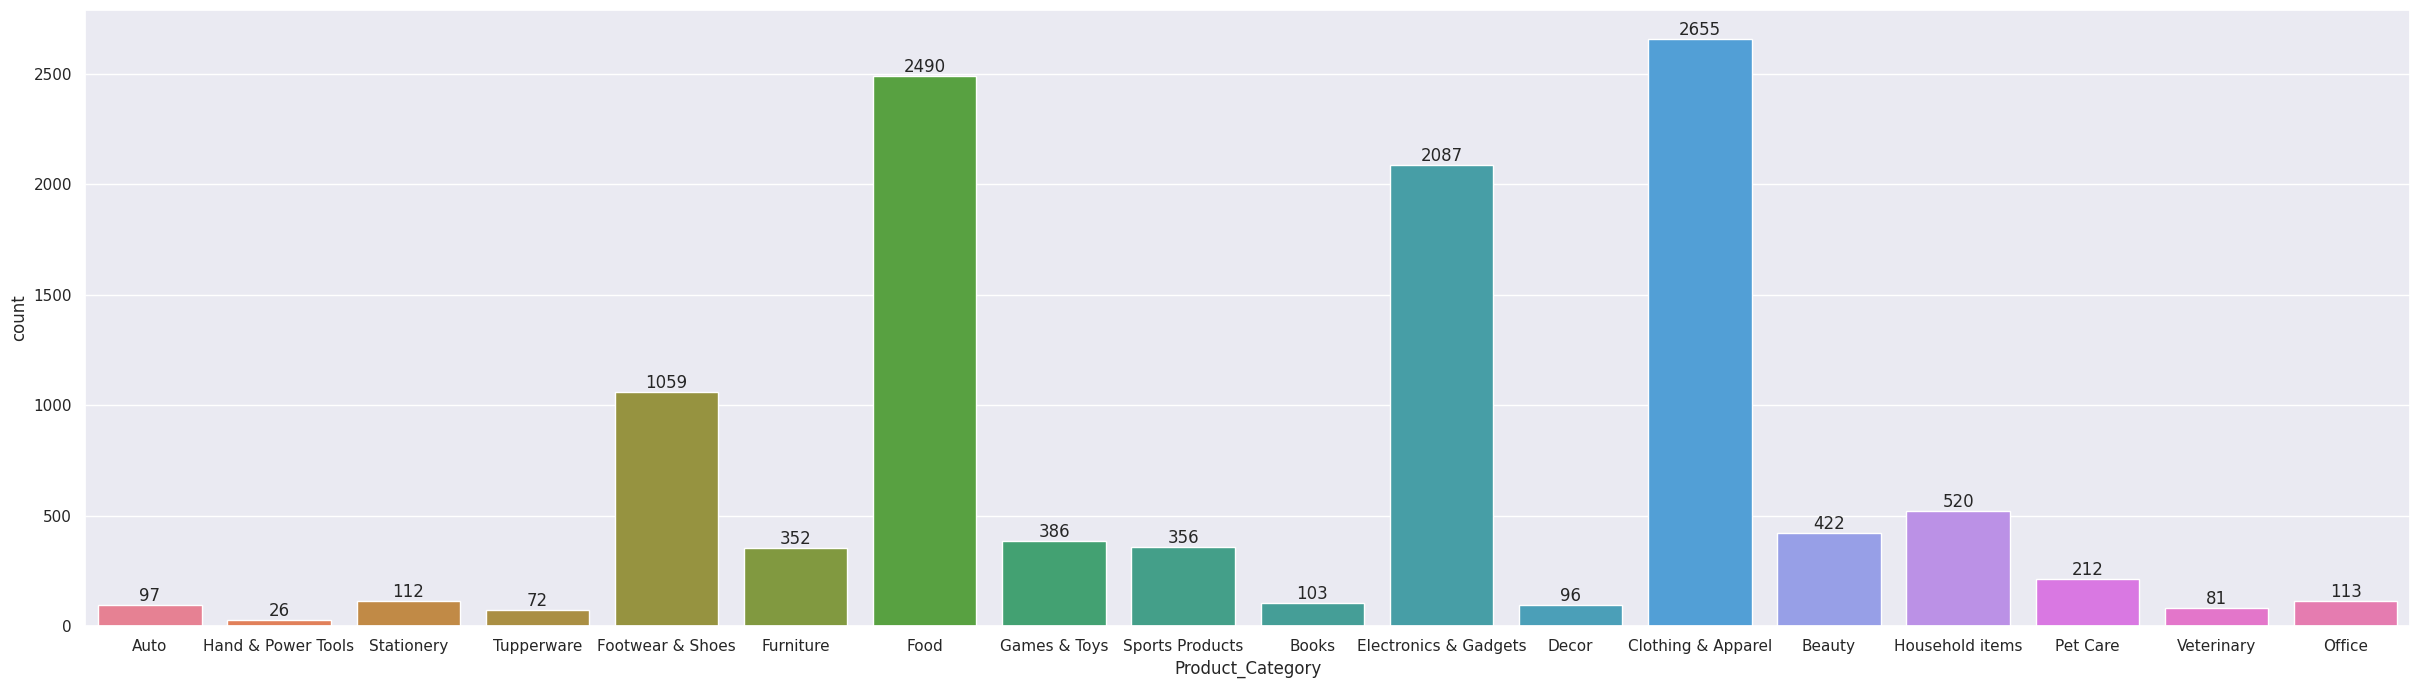

In [ ]:
sns.set(rc={'figure.figsize':(30,8)})
ax = sns.countplot(x = 'Product_Category', data=df, palette = 'husl')
for bar in ax.containers:
  ax.bar_label(bar)

<ipython-input-34-1b8defbf641c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_Product_Category, x='Product_Category',y='Amount',palette = 'deep')


<Axes: xlabel='Product_Category', ylabel='Amount'>

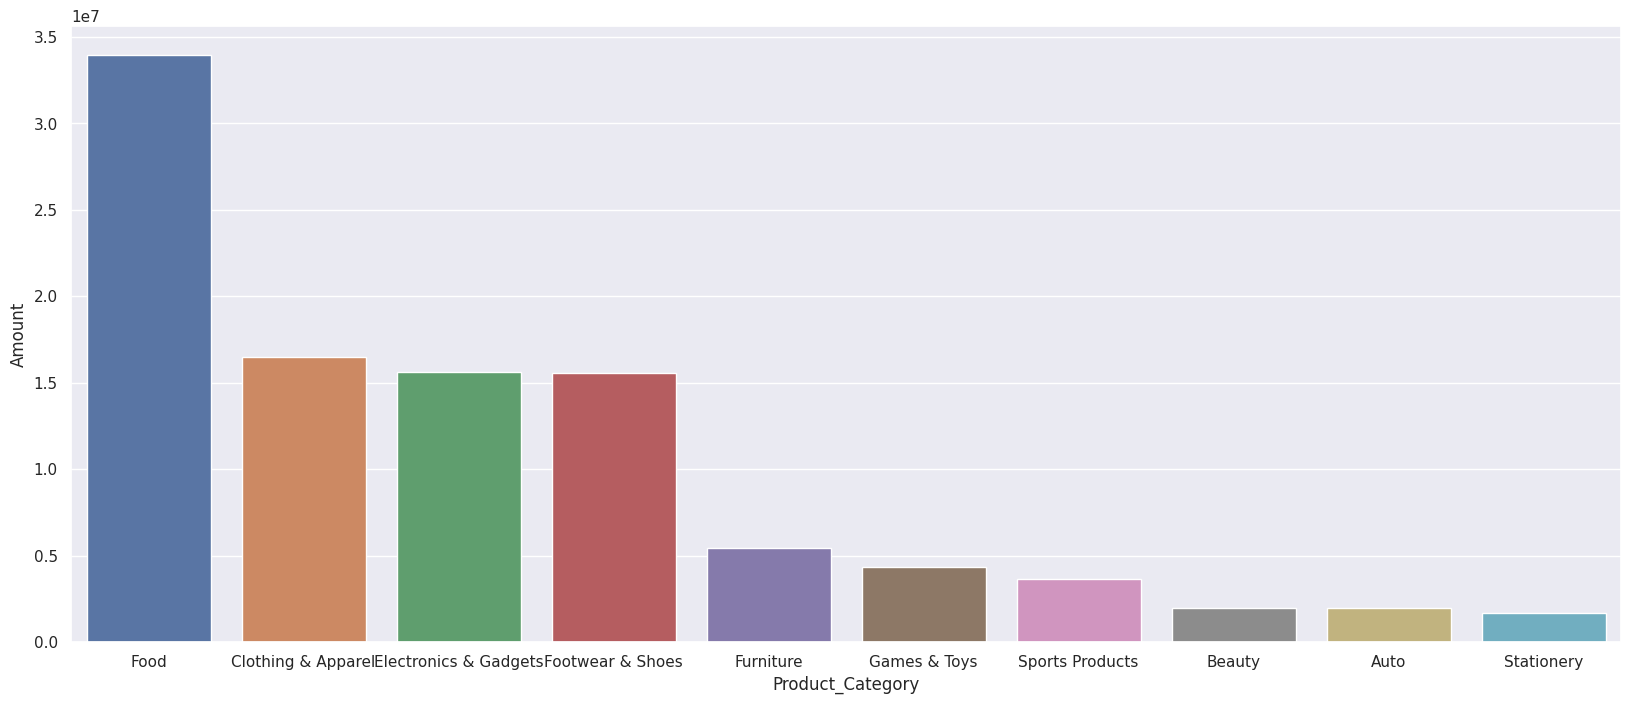

In [ ]:
sale_Product_Category = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data=sale_Product_Category, x='Product_Category',y='Amount',palette = 'deep')

From the above graph most sold product is Food, clothing and Electronics

#**Product_Id**

<ipython-input-35-5d7da8ede368>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_Product_Id, x='Product_ID',y='Amount',palette = 'deep')


<Axes: xlabel='Product_ID', ylabel='Amount'>

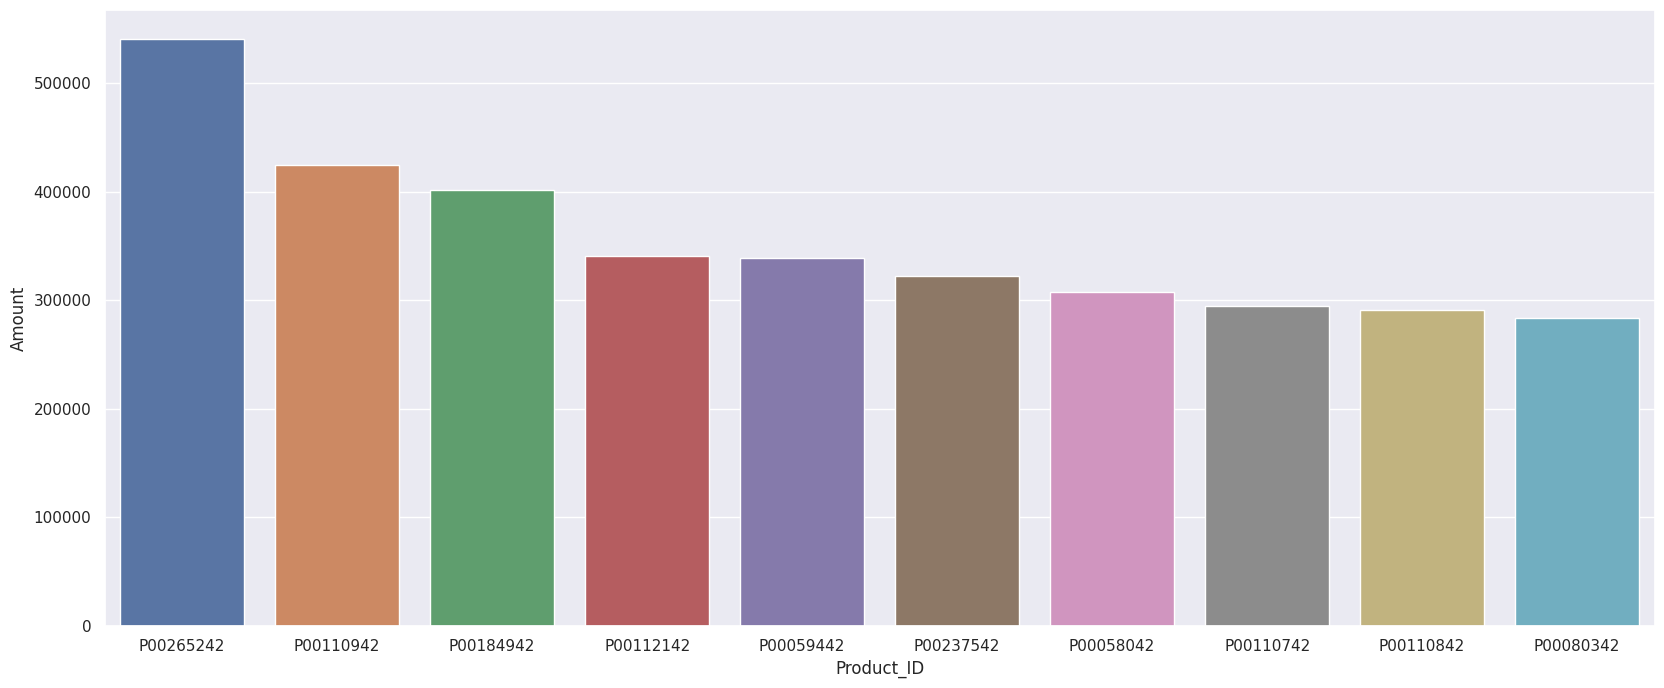

In [ ]:
sale_Product_Id = df.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data=sale_Product_Id, x='Product_ID',y='Amount',palette = 'deep')

#**Conclusion**

Married women **Age Group 26-35 years** from **Uttar Pradesh, Maharashtra, Karnataka** working in **IT sector ,Healthcare ,Aviation** are more likely buy products from **Food, Clothing and Electronics** caterogy

**Thank You**